In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [68]:
house_price_df=pd.read_excel('sample_dataset.xlsx') # Dataframe
y=house_price_df['SalePrice']

In [69]:
y.skew()

0.05322944456588281

In [70]:
y.kurt()

-1.1846712275463889

In [71]:
house_price_df.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [72]:
na_df=pd.DataFrame({'col_name':house_price_df.columns,'na_count':house_price_df.isnull().sum(),
              'na_pc':house_price_df.isnull().sum()/house_price_df.shape[0]*100})

In [73]:
na_df

,col_name,na_count,na_pc
ID,ID,0,0.0
OverallQual,OverallQual,0,0.0
GrLivArea,GrLivArea,0,0.0
YearBuilt,YearBuilt,0,0.0
TotalBsmtSF,TotalBsmtSF,0,0.0
FullBath,FullBath,0,0.0
HalfBath,HalfBath,0,0.0
GarageCars,GarageCars,0,0.0
GarageArea,GarageArea,0,0.0
SalePrice,SalePrice,0,0.0


In [74]:
cols_to_drop=[]
for col in house_price_df.columns:
    if house_price_df[col].nunique()==1 or house_price_df[col].nunique()==house_price_df.shape[0]:
        cols_to_drop.append(col)

cols_to_drop.append('SalePrice')

house_price_df.drop(columns=cols_to_drop,inplace=True)

In [75]:
cols_to_drop

['ID', 'SalePrice']

In [76]:
from datetime import datetime
current_date_time = datetime.now()
current_year = current_date_time.year

In [77]:
house_price_df['house_age'] = current_year - house_price_df['YearBuilt']
house_price_df.drop(columns = ['YearBuilt'],inplace=True)

In [78]:
house_price_df['FullBath'].unique()

array([1, 3, 4, 2])

In [79]:
house_price_df.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,house_age
0,5,629,702,1,0,3,627,2
1,2,2402,251,1,1,3,705,52
2,7,1547,1224,3,0,1,282,56
3,1,666,2890,4,1,3,39,87
4,9,2946,768,2,1,4,848,39


In [80]:
house_price_df.dtypes

OverallQual    int64
GrLivArea      int64
TotalBsmtSF    int64
FullBath       int64
HalfBath       int64
GarageCars     int64
GarageArea     int64
house_age      int64
dtype: object

In [81]:
# list of numerical variables
dataset=pd.read_excel('sample_dataset.xlsx')
numerical_features = [feature for feature in house_price_df.columns if house_price_df[feature].dtypes != 'O']
print("numerical Variables Count: {}".format(len(numerical_features)))


numerical Variables Count: 8


In [82]:
num_cols=numerical_features


In [83]:
X_train,X_test,y_train,y_test=train_test_split(house_price_df,y,test_size=0.3,random_state=42)

In [84]:
X_train

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,house_age
541,7,2868,2184,2,2,4,897,80
440,7,1952,1903,1,2,3,280,44
482,6,3319,2927,4,1,1,799,47
422,6,3014,2608,4,1,0,105,80
778,7,2622,181,1,2,4,985,86
...,...,...,...,...,...,...,...,...
106,9,542,2675,1,1,4,568,74
270,10,1967,177,2,1,0,664,93
860,2,2991,1049,2,0,0,633,83
435,1,1050,2958,3,2,4,104,60


In [85]:
scaler=StandardScaler()

for col in num_cols:
    X_train[col]=scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=scaler.transform(np.array(X_test[col]).reshape(-1,1))

In [86]:
X_train

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,house_age
541,0.476193,0.998722,0.428338,-0.431090,1.236697,1.393234,1.418306,0.429064
440,0.476193,-0.044809,0.152984,-1.305766,1.236697,0.674013,-0.745475,-0.600102
482,0.134661,1.512513,1.156411,1.318261,0.001764,-0.764429,1.074626,-0.514338
422,0.134661,1.165049,0.843820,1.318261,0.001764,-1.483651,-1.359189,0.429064
778,0.476193,0.718473,-1.534422,-1.305766,1.236697,1.393234,1.726917,0.600592
...,...,...,...,...,...,...,...,...
106,1.159256,-1.651118,0.909474,-1.305766,0.001764,1.393234,0.264523,0.257536
270,1.500787,-0.027721,-1.538341,-0.431090,0.001764,-1.483651,0.601190,0.800707
860,-1.231465,1.138847,-0.683860,-0.431090,-1.233169,-1.483651,0.492474,0.514828
435,-1.572997,-1.072391,1.186789,0.443585,1.236697,1.393234,-1.362696,-0.142695


In [87]:
X_train_final = X_train.copy()
X_test_final = X_test.copy()

In [88]:
linreg=LinearRegression()
linreg.fit(X_train_final,y_train)

pred=linreg.predict(X_test_final)

r2_score(y_test,pred)

print('Test Score',linreg.score(X_train_final,y_train))

print('Test Score',linreg.score(X_test_final,y_test))

Test Score 0.009678601891689675
Test Score -0.02439536901004069


### Inference: As the test score is in negative the model is clearly undergoing overfittting so this can't be used

In [90]:
# stochastic gradient descent regressor
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(verbose=4) # the other parameters like verbose are penalty,loss,alpha,etc all these are called as hyper-parameters
#hyper-parameters: parameters like b1,b2 are not in our hand and we znt control them, but the hyper parameters are the parameters that we can control thsts why they are called as HYPER parameters
sgd_reg.fit(X_train_final,y_train)
pred=sgd_reg.predict(X_test_final)
r2_score(y_test,pred)

-- Epoch 1
Norm: 10155.53, NNZs: 8, Bias: 223624.625316, T: 700, Avg. loss: 15802744363.870600
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 12637.11, NNZs: 8, Bias: 252755.723703, T: 1400, Avg. loss: 8652417601.564144
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 13678.54, NNZs: 8, Bias: 262794.990853, T: 2100, Avg. loss: 8320501868.312391
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 14642.20, NNZs: 8, Bias: 265790.865058, T: 2800, Avg. loss: 8275643585.405190
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 12920.81, NNZs: 8, Bias: 265542.966301, T: 3500, Avg. loss: 8262616586.075876
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13140.08, NNZs: 8, Bias: 265079.733708, T: 4200, Avg. loss: 8263056711.413939
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 12700.10, NNZs: 8, Bias: 267103.430630, T: 4900, Avg. loss: 8255482327.817579
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 11306.42, NNZs: 8, Bias: 265073.555294, T: 5600, Avg. loss: 8251858536.74

-0.025808175167747915

In [91]:
sgd_reg.score(X_train_final,y_train)
sgd_reg.score(X_test_final,y_test)

-0.025808175167747915

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF is a measure of multicollinearity

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X_train_final.values,i) for i in range(X_train_final.shape[1])]
vif["VIF Features"] =X_train_final.columns
vif

,VIF Factor,VIF Features
0,1.007933,OverallQual
1,1.015130,GrLivArea
2,1.005904,TotalBsmtSF
3,1.003492,FullBath
4,1.006844,HalfBath
5,1.003205,GarageCars
6,1.006181,GarageArea
7,1.012416,house_age


In [96]:
n_estimates=list(range(20,200,20))

from sklearn.ensemble import RandomForestRegressor

accuracy=[]
for val in n_estimates:
    rndm_frt_rgr=RandomForestRegressor(n_estimators=val)
    rndm_frt_rgr.fit(X_train_final,y_train)
    accuracy.append(rndm_frt_rgr.score(X_test_final,y_test))
accuracy


[0.8181571328722552,
 0.836558294798003,
 0.839752624144865,
 0.8413282178246038,
 0.8391107485326176,
 0.8477331848446503,
 0.8451373725356283,
 0.8458939973827805,
 0.8497595449153429]

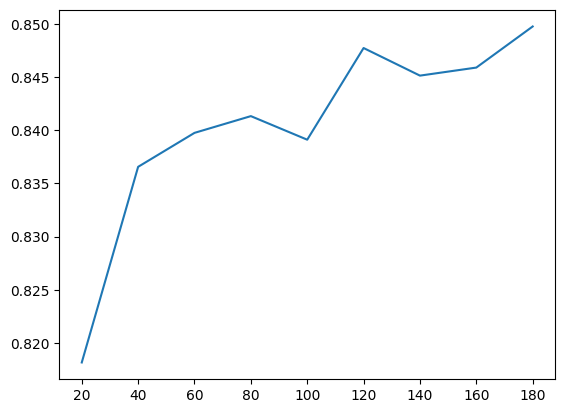

In [97]:
from matplotlib.pyplot import plot
plot(n_estimates,accuracy)

In [98]:
param_dict={'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9],
           'max_features':['auto', 'sqrt', 'log2']}
from  sklearn.model_selection import GridSearchCV
gcv= GridSearchCV(rndm_frt_rgr,param_grid=param_dict,cv=5,verbose=5)
gcv.fit(X_train_final,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_fea

[CV 4/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=70;, score=-0.020 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=70;, score=0.007 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=-0.022 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=-0.056 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=-0.079 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=-0.018 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=-0.019 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=50;, score=-0.033 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=sqrt, min_samples_split=7, n_

[CV 1/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60;, score=-0.053 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60;, score=-0.085 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60;, score=-0.077 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60;, score=-0.035 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60;, score=-0.022 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=70;, score=-0.036 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=70;, score=-0.070 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_split=7, n_estimators=70;, score=-0.073 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_split=7, n_esti

[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=-0.087 total time=   0.1s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=-0.044 total time=   0.1s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.001 total time=   0.1s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60;, score=-0.077 total time=   0.1s
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60;, score=-0.045 total time=   0.1s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60;, score=-0.062 total time=   0.1s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60;, score=-0.036 total time=   0.1s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=60;, score=-0.041 total time=   0.1s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_split=4, n_estim

[CV 4/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.043 total time=   0.2s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.025 total time=   0.2s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100;, score=-0.061 total time=   0.2s
[CV 2/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100;, score=-0.054 total time=   0.2s
[CV 3/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100;, score=-0.100 total time=   0.2s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100;, score=-0.059 total time=   0.2s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100;, score=-0.023 total time=   0.2s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_split=7, n_estimators=50;, score=-0.047 total time=   0.1s
[CV 2/5] END max_depth=8, max_features=log2, min_samples_split=7, n

[CV 1/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_split=9, n_estimators=60;, score=nan to

[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=70;, score=-0.074 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=70;, score=-0.063 total time=   0.1s
[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=70;, score=-0.008 total time=   0.1s
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=100;, score=-0.036 total time=   0.2s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=100;, score=-0.054 total time=   0.2s
[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=100;, score=-0.087 total time=   0.2s
[CV 4/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=100;, score=-0.040 total time=   0.2s
[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=100;, score=-0.016 total time=   0.2s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_split=4, n

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=180),
             param_grid={'max_depth': [7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [4, 7, 9],
                         'n_estimators': [50, 60, 70, 100]},
             verbose=5)

In [101]:
gcv.best_params_
gcv.predict(X_test_final)
gcv.score(X_train_final,y_train)


0.2908434241823492

In [102]:
# hyper parameter tuning
param_dict={'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9],
           'max_features':['auto', 'sqrt', 'log2']}
from  sklearn.model_selection import RandomizedSearchCV
rcv= RandomizedSearchCV(rndm_frt_rgr,param_distributions=param_dict,cv=5,n_iter=9,verbose=5)
rcv.fit(X_train_final,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=7, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.048 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.049 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.075 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.043 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_split=4, n_estimators=70;, score=-0.006 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100;, score=-0.040 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100;, score=-0.080 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100;, score=-0.079 total time=   0.1s
[CV 4/5] 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=180),
                   n_iter=9,
                   param_distributions={'max_depth': [7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 7, 9],
                                        'n_estimators': [50, 60, 70, 100]},
                   verbose=5)

In [103]:
rcv.best_params_
rcv.predict(X_test_final)
rcv.score(X_train_final,y_train)

0.32901242570727074

In [33]:
# 01-03-2021 assignment : do try the gradient boost model to all the available datasets(gradiet boost regressor for datasets with op varible being continuous and GBoost Classifier for classification prblm).also do the hyper parameter tuning

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
grd_bst_rgr=GradientBoostingRegressor()

grd_bst_rgr.fit(X_train_final,y_train)
grd_bst_rgr.predict(X_test_final)
grd_bst_rgr.score(X_train_final,y_train)
grd_bst_rgr.score(X_test_final,y_test)

-0.136040096678411

In [35]:
from  sklearn.model_selection import RandomizedSearchCV
param_dict_gd_br={'n_estimators':[50,60,70,100],
            'learning_rate':[0.1,0.12,0.14,0.16],
            'criterion':['friedman_mse','mse','mae'],
           'subsample':[0.8,0.9,1],
             'min_samples_split':[2,3,4]}
rcv_grd_rgr= RandomizedSearchCV(grd_bst_rgr,param_distributions=param_dict_gd_br,cv=5,n_iter=9,verbose=5)
rcv_grd_rgr.fit(X_train_final,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END criterion=mae, learning_rate=0.12, min_samples_split=4, n_estimators=50, subsample=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, learning_rate=0.12, min_samples_split=4, n_estimators=50, subsample=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, learning_rate=0.12, min_samples_split=4, n_estimators=50, subsample=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, learning_rate=0.12, min_samples_split=4, n_estimators=50, subsample=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, learning_rate=0.12, min_samples_split=4, n_estimators=50, subsample=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.14, min_samples_split=4, n_estimators=50, subsample=1;, score=-0.115 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.14, min_samples_split=4, n_estimators=50, subsample=1;, score=-0.161 total time=   0.1s
[CV 3/5] END 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=9,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.12, 0.14,
                                                          0.16],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [50, 60, 70, 100],
                                        'subsample': [0.8, 0.9, 1]},
                   verbose=5)

In [36]:
rcv_grd_rgr.score(X_train_final,y_train)
rcv_grd_rgr.score(X_test_final,y_test)
rcv_grd_rgr.best_params_

{'subsample': 1,
 'n_estimators': 60,
 'min_samples_split': 2,
 'learning_rate': 0.12,
 'criterion': 'friedman_mse'}

# Inference: Random Forest Regressor is performing in the better way while comparing to other models